# Exploratory Data Analysis v1.0

This notebook will contain a series of exploratory data analysis (EDA), one of the most important steps in any data science project. The goal of this notebook is to provide a quick overview of the data and the methods used to explore it. The final objective is to select wich variables will be used as features in the machine learning models and wich variable will be used as a target variable.

## 1. Imports

In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import sys
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_palette('Paired')
sns.set_style("whitegrid")

## 2. Reading Data

In [21]:
data = pd.read_parquet('../data/processed/v0-enem-processed-20220531.parquet')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508568 entries, 0 to 508567
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           508568 non-null  object 
 1   enem_year                    508568 non-null  int64  
 2   age                          508568 non-null  object 
 3   sex                          508568 non-null  object 
 4   marital_status               508568 non-null  object 
 5   color_race                   508568 non-null  object 
 6   id_city_school               114540 non-null  float64
 7   id_city_test                 508568 non-null  int64  
 8   high_school_status           508568 non-null  object 
 9   year_completion_high_school  508568 non-null  int64  
 10  school_type                  508568 non-null  object 
 11  presence_day_1               508568 non-null  int64  
 12  presence_day_2               508568 non-null  int64  
 13 

## 3. Exploratory Data Analysis

### 3.1 Check NULL Values

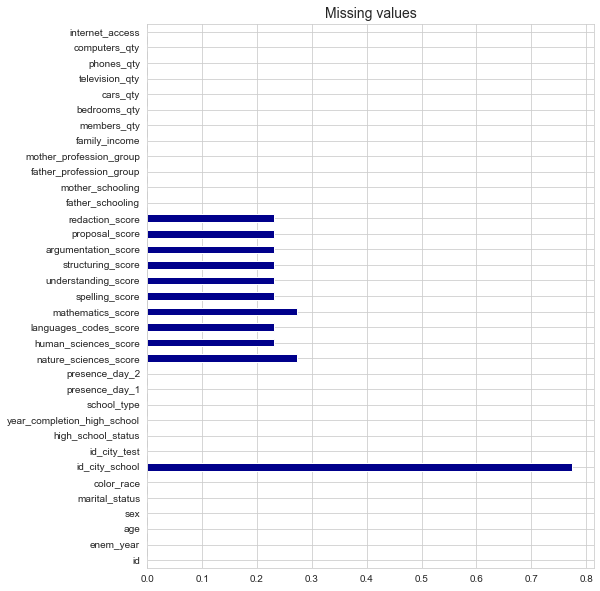

In [3]:
(data.isna().sum() / data.shape[0]).plot.barh(figsize = (8, 10), color = 'darkblue')
plt.title('Missing values', fontsize = 14)
plt.savefig('../reports/figures/missing_values.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

The dataset has a lot of missing values. Especially in score data and id_city_school. In the first case, it occurs because the score data is not filled if the student didn't take the test. In the second case, it's mandatory to fill this field only if high_school_status is equal to "Ends in the current year".

*  The id_city_school will be removed from the dataset because it is not useful for the modelling;
*  The candidates that have null values in score data will be removed from the dataset.


### 3.2 Missed candidates

In [65]:
# ordered labels
income_order = [
    'No income',
    'Less than BRL 1.045,00',
    'BRL 1.045,01 to BRL 1.567,50',
    'BRL 2.090,01 to BRL 2.612,50',
    'BRL 1.567,51 to BRL 2.090,00',
    'BRL 2.612,51 to BRL 3.135,00',
    'BRL 3.135,01 to BRL 4.180,00',
    'BRL 4.180,01 to BRL 5.225,00',
    'BRL 5.225,01 to BRL 6.270,00',
    'BRL 6.270,01 to BRL 7.315,00',
    'BRL 7.315,01 to BRL 8.360,00',
    'BRL 8.360,01 to BRL 9.405,00',
    'BRL 9.405,01 to BRL 10.450,00',
    'BRL 10.450,01 to BRL 12.540,00',
    'BRL 12.540,01 to BRL 15.675,00',
    'BRL 15.675,01 to BRL 20.900,00',
    'More than BRL 20.900,00'
]

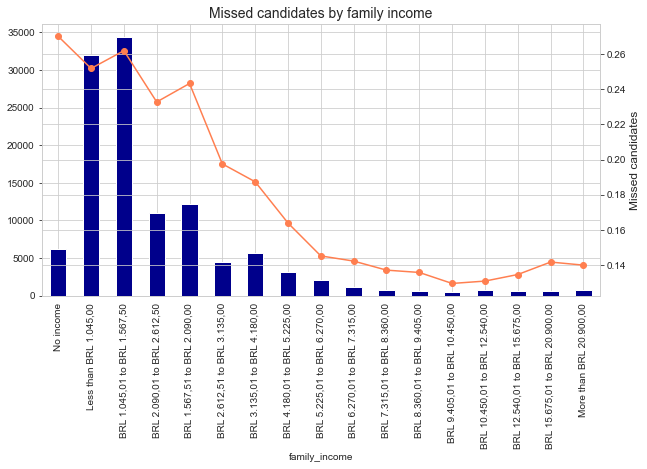

In [68]:
missed_candidates = data.query('presence_day_1 == 0').groupby('family_income').size()[income_order]
total_candidates = data.groupby('family_income').size()[income_order]

bar_plot = missed_candidates.plot.bar(figsize = (8, 5), color = 'darkblue')

# right side 
line_plot = bar_plot.twinx()
(missed_candidates/total_candidates).plot(figsize = (10, 5), color = 'coral', marker = 'o', ax = line_plot)

plt.title('Missed candidates by family income', fontsize = 14)
plt.xlabel('Family income', fontsize = 12)
plt.ylabel('Missed candidates', fontsize = 12)
plt.savefig('../reports/figures/missed_candidates_by_income.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

### 3.3 School Type Distribution

In [ ]:
# filter out candidates that failed in ENEM in one of the two days
# each presence day has value 1 then (presence_day_1 + presence_day_2) is equal 2
present_candidates = data.drop('id_city_school', axis = 1, errors = 'ignore').query('(presence_day_1 + presence_day_2) == 2').dropna()
present_candidates.head(5)

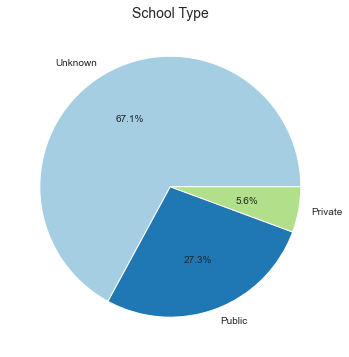

In [18]:
present_candidates.school_type.value_counts().plot.pie(figsize = (6, 6), autopct = '%1.1f%%')

plt.title('School Type', fontsize = 14)
plt.ylabel(None)
plt.savefig('../reports/figures/school_type_allcandidates.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

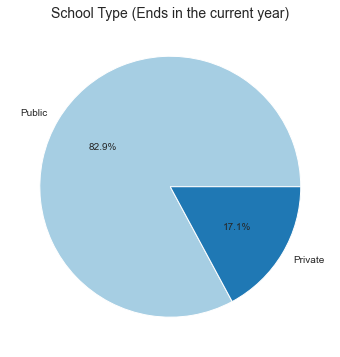

In [19]:
present_candidates.query('high_school_status == "Ends in the current year"').school_type.value_counts().plot.pie(figsize = (6, 6), autopct = '%1.1f%%')

plt.title('School Type (Ends in the current year)', fontsize = 14)
plt.ylabel(None)
plt.savefig('../reports/figures/school_type_endscurrentyear.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

As explained in the previous observation, the school_type variable is filled just if the student is a high school student. The majority of the candidates study in public high schools.